In [1]:
import pandas as pd

In [2]:
citibike_data = None

for month in range(1,13):
    if month < 10:
        month_str = f'0{month}'
    else:
        month_str = f'{month}'
    print('Loading month', month_str)
    current_month = pd.read_csv(f'../dataset/2018{month_str}-citibike-tripdata.csv')
    
    if citibike_data is None:
        citibike_data = current_month
    else:
        citibike_data = citibike_data.append(current_month)

Loading month 01
Loading month 02
Loading month 03
Loading month 04
Loading month 05
Loading month 06
Loading month 07
Loading month 08
Loading month 09
Loading month 10
Loading month 11
Loading month 12


Prepare data

In [3]:
citibike_data = citibike_data.dropna()

In [4]:
import numpy as np

citibike_data['starttime'] = pd.to_datetime(citibike_data['starttime'])
citibike_data['stoptime'] = pd.to_datetime(citibike_data['stoptime'])

citibike_data['tripduration'] = (citibike_data['stoptime'] - citibike_data['starttime']).dt.total_seconds().apply(np.floor).astype(int)

In [6]:
filter_columns = [
    'tripduration', 
    'starttime', 
    'stoptime', 
    'start station id',
    'start station latitude',
    'start station longitude',
    'end station id',
    'end station latitude',
    'end station longitude',
    'usertype',
    'gender'
]
citibike_data = citibike_data[filter_columns]

In [7]:
citibike_data = citibike_data[citibike_data['tripduration'] <= 20*24*60*60]

In [58]:
import math
interval_300 = 300 # 5 minutes
max_range_300 = (math.ceil(citibike_data['tripduration'].max() / interval_300) + 1) * interval_300
ranges_300 = list(range(0, max_range_300, interval_300))
interval_900 = 900 # 15 minutes
max_range_900 = (math.ceil(citibike_data['tripduration'].max() / interval_900) + 1) * interval_900
ranges_900 = list(range(0, max_range_900, interval_900))
print(ranges_900[-1])
citibike_data['tripduration'].max()

1726200


1725410

In [59]:
citibike_data['tripduration_300'] = pd.cut(citibike_data['tripduration'], ranges_300)
citibike_data['tripduration_900'] = pd.cut(citibike_data['tripduration'], ranges_900)

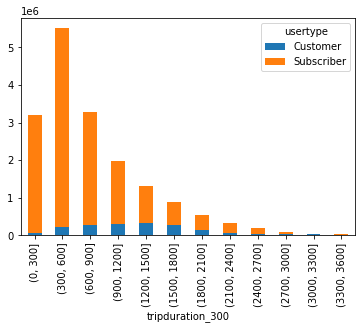

In [60]:
duration_bins = citibike_data[citibike_data['tripduration'] < 7200].groupby(['tripduration_300', 'usertype']).size()

index_subselection = duration_bins.index.to_list()[:24]
duration_bins.index
duration_bins[duration_bins.index.isin(index_subselection)].unstack().plot(kind='bar', stacked=True)

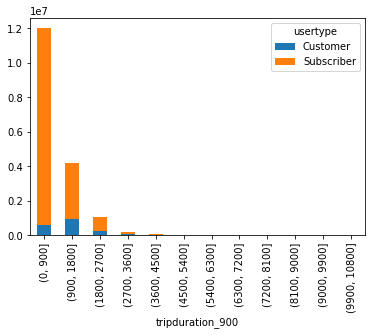

In [61]:
duration_bins = citibike_data.groupby(['tripduration_900', 'usertype']).size()

index_subselection = duration_bins.index.to_list()[:24]
duration_bins.index
duration_bins[duration_bins.index.isin(index_subselection)].unstack().plot(kind='bar', stacked=True)

In [48]:
columns = [
    'usertype', 
    'tripduration_bin'
]
citibike_data[columns].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,usertype,tripduration_bin
usertype,1.000000,0.072172
tripduration_bin,0.072172,1.000000


In [63]:
citibike_data['start_month'] = citibike_data['starttime'].dt.month_name()
citibike_data['stop_month'] = citibike_data['stoptime'].dt.month_name()

In [64]:
columns = [
    'usertype', 
    'start_month',
    'stop_month'
]
citibike_data[columns].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,usertype,start_month,stop_month
usertype,1.000000,0.023512,0.023528
start_month,0.023512,1.000000,0.999971
stop_month,0.023528,0.999971,1.000000


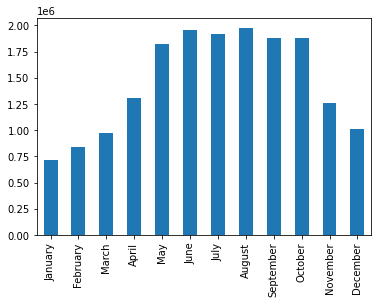

In [70]:
months = [
    'January', 
    'February', 
    'March', 
    'April', 
    'May', 
    'June', 
    'July', 
    'August', 
    'September', 
    'October', 
    'November', 
    'December'
]
citibike_data['start_month'].value_counts()[months].plot(kind="bar")

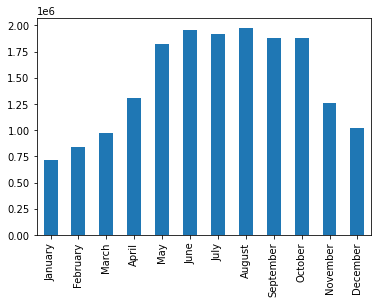

In [75]:
citibike_data['stop_month'].value_counts()[months].plot(kind="bar")